# Netflix - Data Exploration and Visualisation
performing Exploratry Data Analysis to understant the Dataset

**Task**
* Understand the Dataset, types and missing values
* Clean the dataset and handle the missing values
* Perform the data visulization
* Create final summary report

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('netflix.csv')

In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Correcting Data types and filling missing values

In [7]:
df.isna().sum() #for missing values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.isnull().sum()/len(df)*100  #missing values in percentage

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

**The following colums have missing values**
* director
* cast
* country
* date_added
* rating
* duration

**The data type of data_added must be datetime**


In [9]:
df['date_added']=pd.to_datetime(df['date_added'])

In [10]:
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
pd.DataFrame(df['cast'].value_counts().sort_values(ascending=False))

,cast
David Attenborough,19
"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil",14
Samuel West,10
Jeff Dunham,7
"David Spade, London Hughes, Fortune Feimster",6
...,...
"Patrick Davis, Lisa Vidal, Josh Pence, José Zúñiga, Haley Ramm, Matt Angel, J. Michael Trautmann, Lobo Sebastian",1
"Anna Demetriou, Timo Nieminen, Will Mellor, Andrew Whipp, Paul Freeman, Terence Stamp, Ian Beattie, Victoria Broom, Taylor Frost, Martyn Ford",1
"Emile Hirsch, Zoë Kravitz, Emory Cohen, Zoey Deutch, Beau Knapp, Jason Mitchell, Scott Mescudi, Jeff Gum, Joey Bicicchi",1
"Vidit Kumar, Roopa Bhimani, Anubhav Saha, Brian Dcosta",1


In [13]:
splitter = df['cast'].apply(lambda x: str(x).split(', ')).tolist()

In [14]:
splitter

[['nan'],
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng'],
 ['Sami Bouajila',
  'Tracy Gotoas',
  'Samuel Jouy',
  'Nabiha Akkari',
  'Sofia Lesaffre',
  'Salim Kechiouche',
  'Noureddine Farihi',
  'Geert Van Rampelberg',
  'Bakary Diombera'],
 ['nan'],
 ['Mayur More',
  'Jitendra Kumar',
  'Ranjan Raj',
  'Alam Khan',
  'Ahsaas Channa',
  'Revathi Pillai',
  'Urvi Singh',
  'Arun Kumar'],
 ['Kate Siegel',
  'Zach Gilford',
  'Hamish Linklater',
  'Henry Thomas',
  'Kristin Lehman',
  'Samantha Sloyan',
  'Igby Rigney',
  'Rahul Kohli',
  'Annarah Cymone',
  'Annabeth Gish',
  'Alex Essoe',
  'Rahul Abburi',
  'Matt Biedel',
  'Michael Trucco',
  'Crystal Ba

In [15]:
df_cast = pd.DataFrame(splitter, index=df['title'])

In [16]:
df_cast

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [17]:
df_cast = pd.DataFrame(df_cast.stack()).reset_index()

In [18]:
df_cast

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
64946,Zubaan,3,Manish Chaudhary
64947,Zubaan,4,Meghna Malik
64948,Zubaan,5,Malkeet Rauni
64949,Zubaan,6,Anita Shabdish


In [19]:
df_cast = df_cast[['title',0]]
df_cast.columns=['title','actor']
df_cast

,title,actor
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [20]:
df = df.merge(df_cast, on='title',how='inner')

# Seperating the genres

In [21]:
splitter = df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()

In [22]:
splitter

[['Documentaries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteri

In [23]:
df_genre = pd.DataFrame(splitter, index=df['title'])

In [24]:
df_genre

,0,1,2
title,,,
Dick Johnson Is Dead,Documentaries,None,None
Blood & Water,International TV Shows,TV Dramas,TV Mysteries
Blood & Water,International TV Shows,TV Dramas,TV Mysteries
Blood & Water,International TV Shows,TV Dramas,TV Mysteries
Blood & Water,International TV Shows,TV Dramas,TV Mysteries
...,...,...,...
Zubaan,Dramas,International Movies,Music & Musicals
Zubaan,Dramas,International Movies,Music & Musicals
Zubaan,Dramas,International Movies,Music & Musicals


In [25]:
df_genre = pd.DataFrame(df_genre.stack()).reset_index()

In [26]:
df_genre=df_genre[['title',0]]

In [27]:
df_genre.columns=['title','genre']

In [28]:
df_genre

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Blood & Water,International TV Shows
...,...,...
149507,Zubaan,International Movies
149508,Zubaan,Music & Musicals
149509,Zubaan,Dramas
149510,Zubaan,International Movies


In [29]:
df = df.merge(df_genre, on='title',how='inner')

In [30]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,actor,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows


In [31]:
del df['listed_in']

In [32]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,actor,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",nan,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows


**Unit issue with time**
* Time must be in integer
* Removing min from time eg:- '90 min' to 90

In [33]:
df['duration_new'] = df['duration'].apply(lambda x: str(x).split(' ')[0])

In [34]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,actor,genre,duration_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",nan,Documentaries,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,2
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Dramas,2
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Mysteries,2
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559785,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,International Movies,111
1559786,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Music & Musicals,111
1559787,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Dramas,111
1559788,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,International Movies,111


In [35]:
del df['cast']
del df['duration']

# Filling missing values

In [36]:
df.fillna({'rating':'Unavilable','actor':'Unavilable','country':'Unavilable','director':'Unavilable'},inplace=True)
df.isna().sum()

show_id            0
type               0
title              0
director           0
country            0
date_added      1604
release_year       0
rating             0
description        0
actor              0
genre              0
duration_new       0
dtype: int64

For missing values of date can be subtitued by most recent date or we can drop the missing values.

In [37]:
df[df.date_added.isnull()] #To check where date_added values has null value

,show_id,type,title,director,country,date_added,release_year,rating,description,actor,genre,duration_new
1116527,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavilable,United Kingdom,NaT,2013,TV-MA,"Set during the Russian Revolution, this comic ...",Daniel Radcliffe,British TV Shows,2
1116528,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavilable,United Kingdom,NaT,2013,TV-MA,"Set during the Russian Revolution, this comic ...",Daniel Radcliffe,TV Comedies,2
1116529,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavilable,United Kingdom,NaT,2013,TV-MA,"Set during the Russian Revolution, this comic ...",Daniel Radcliffe,TV Dramas,2
1116530,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavilable,United Kingdom,NaT,2013,TV-MA,"Set during the Russian Revolution, this comic ...",Daniel Radcliffe,British TV Shows,2
1116531,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavilable,United Kingdom,NaT,2013,TV-MA,"Set during the Russian Revolution, this comic ...",Daniel Radcliffe,TV Comedies,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1455107,s8183,TV Show,The Adventures of Figaro Pho,Unavilable,Australia,NaT,2015,TV-Y7,"Imagine your worst fears, then multiply them: ...",Aletheia Burney,TV Comedies,2
1455108,s8183,TV Show,The Adventures of Figaro Pho,Unavilable,Australia,NaT,2015,TV-Y7,"Imagine your worst fears, then multiply them: ...",Aletheia Burney,Kids' TV,2
1455109,s8183,TV Show,The Adventures of Figaro Pho,Unavilable,Australia,NaT,2015,TV-Y7,"Imagine your worst fears, then multiply them: ...",Aletheia Burney,TV Comedies,2
1455110,s8183,TV Show,The Adventures of Figaro Pho,Unavilable,Australia,NaT,2015,TV-Y7,"Imagine your worst fears, then multiply them: ...",Aletheia Burney,Kids' TV,2


In [38]:
most_recent_entry_date=df['date_added'].max()
df.fillna({'date_added':most_recent_entry_date},inplace=True)

In [39]:
df[df.show_id=='s8183'] #Checking if date_added has been filled or not

,show_id,type,title,director,country,date_added,release_year,rating,description,actor,genre,duration_new
1455062,s8183,TV Show,The Adventures of Figaro Pho,Unavilable,Australia,2021-09-25,2015,TV-Y7,"Imagine your worst fears, then multiply them: ...",Luke Jurevicius,Kids' TV,2
1455063,s8183,TV Show,The Adventures of Figaro Pho,Unavilable,Australia,2021-09-25,2015,TV-Y7,"Imagine your worst fears, then multiply them: ...",Luke Jurevicius,TV Comedies,2
1455064,s8183,TV Show,The Adventures of Figaro Pho,Unavilable,Australia,2021-09-25,2015,TV-Y7,"Imagine your worst fears, then multiply them: ...",Luke Jurevicius,Kids' TV,2
1455065,s8183,TV Show,The Adventures of Figaro Pho,Unavilable,Australia,2021-09-25,2015,TV-Y7,"Imagine your worst fears, then multiply them: ...",Luke Jurevicius,TV Comedies,2
1455066,s8183,TV Show,The Adventures of Figaro Pho,Unavilable,Australia,2021-09-25,2015,TV-Y7,"Imagine your worst fears, then multiply them: ...",Luke Jurevicius,Kids' TV,2
1455067,s8183,TV Show,The Adventures of Figaro Pho,Unavilable,Australia,2021-09-25,2015,TV-Y7,"Imagine your worst fears, then multiply them: ...",Luke Jurevicius,TV Comedies,2
1455068,s8183,TV Show,The Adventures of Figaro Pho,Unavilable,Australia,2021-09-25,2015,TV-Y7,"Imagine your worst fears, then multiply them: ...",Luke Jurevicius,Kids' TV,2
1455069,s8183,TV Show,The Adventures of Figaro Pho,Unavilable,Australia,2021-09-25,2015,TV-Y7,"Imagine your worst fears, then multiply them: ...",Luke Jurevicius,TV Comedies,2
1455070,s8183,TV Show,The Adventures of Figaro Pho,Unavilable,Australia,2021-09-25,2015,TV-Y7,"Imagine your worst fears, then multiply them: ...",Luke Jurevicius,Kids' TV,2
1455071,s8183,TV Show,The Adventures of Figaro Pho,Unavilable,Australia,2021-09-25,2015,TV-Y7,"Imagine your worst fears, then multiply them: ...",Luke Jurevicius,TV Comedies,2


checking null values in duration

In [40]:
df[df['duration_new'].isnull()] #accessing the column where duration has null values

,show_id,type,title,director,country,date_added,release_year,rating,description,actor,genre,duration_new


* All movies which have null values in there duration has a common directior that is Louis C.K.
* Here the important thing to note is that duration values are mistakenly placed in rating column.
* So what we have to do is that we need to replace the rating values in duration column and then we have to make rating values as 'unavaliable'

Checking to make sure therre is no other content with same director to avoid accidental overwriting

In [41]:
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,country,date_added,release_year,rating,description,actor,genre,duration_new
1038749,s5542,Movie,Louis C.K. 2017,Louis C.K.,United States,2017-04-04,2017,74 min,"Louis C.K. muses on religion, eternal love, gi...",Louis C.K.,Movies,nan
1081858,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,2016-09-16,2010,84 min,Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.,Movies,nan
1083000,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,2016-08-15,2015,66 min,The comic puts his trademark hilarious/thought...,Louis C.K.,Movies,nan


In [42]:
#loc helps us to easily access the columns by names
df.loc[df['director'] == 'Louis C.K.','duration_new'] = df['rating']
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,country,date_added,release_year,rating,description,actor,genre,duration_new
1038749,s5542,Movie,Louis C.K. 2017,Louis C.K.,United States,2017-04-04,2017,74 min,"Louis C.K. muses on religion, eternal love, gi...",Louis C.K.,Movies,74 min
1081858,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,2016-09-16,2010,84 min,Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.,Movies,84 min
1083000,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,2016-08-15,2015,66 min,The comic puts his trademark hilarious/thought...,Louis C.K.,Movies,66 min


In [43]:
#overwritting the values of rating as unavailable
df.loc[df['director'] == 'Louis C.K.','rating'] = 'Unavailable'
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,country,date_added,release_year,rating,description,actor,genre,duration_new
1038749,s5542,Movie,Louis C.K. 2017,Louis C.K.,United States,2017-04-04,2017,Unavailable,"Louis C.K. muses on religion, eternal love, gi...",Louis C.K.,Movies,74 min
1081858,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,2016-09-16,2010,Unavailable,Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.,Movies,84 min
1083000,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,2016-08-15,2015,Unavailable,The comic puts his trademark hilarious/thought...,Louis C.K.,Movies,66 min


In [44]:
#Checking if all null values are fixed
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
description     0
actor           0
genre           0
duration_new    0
dtype: int64

# Visualizations

In [45]:
df.type.value_counts() #To find the number of movies and shows that are avaliable in netflix

Movie      979272
TV Show    580518
Name: type, dtype: int64

Text(0.5, 1.0, 'Count vs Type of shows')

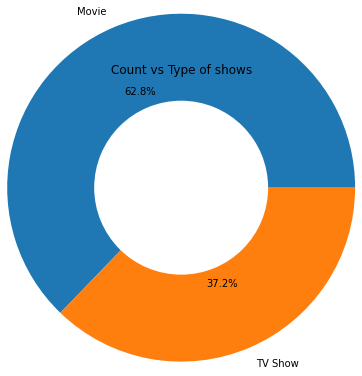

In [73]:
#count plot help us to plot counts of each category
plt.pie(df['type'].value_counts(),labels=set(df['type']),autopct='%0.1f%%',radius=2)
plt.pie([1],colors=['w'],radius=1)
#sns.countplot(x = 'type',data = df)
plt.title('Count vs Type of shows')

On netflix there are more number of movies then tv shows

# Country analysis

In [47]:
df['country'].value_counts().head(10)

United States     432251
India             167716
Unavilable        110077
Japan              90200
United Kingdom     55906
Spain              40788
South Korea        36866
Mexico             33460
Canada             25791
Turkey             23334
Name: country, dtype: int64

Text(0.5, 1.0, 'Country wise Content on Netflix')

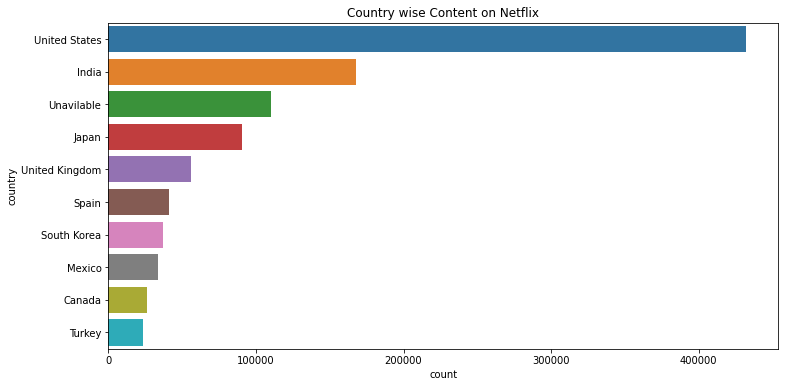

In [78]:
plt.figure(figsize=(12,6))
sns.countplot(y = 'country', order = df['country'].value_counts().index[0:10],data=df)
plt.title('Country wise Content on Netflix')

In [49]:
movie_countries = df[df.type == 'Movie']
tv_show_countries = df[df.type == 'TV Show']

Text(0.5, 1.0, 'Top 10 countries producing TV Shows in netflix')

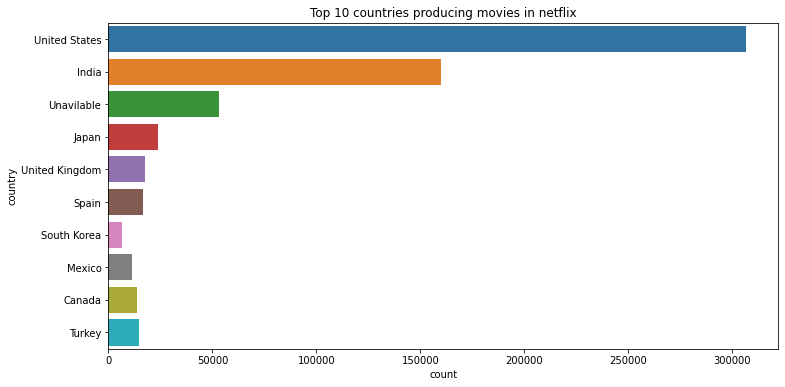

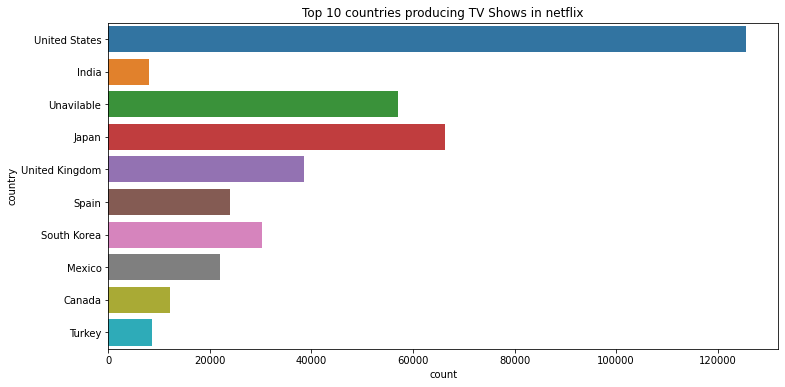

In [50]:
plt.figure(figsize = (12,6))
sns.countplot(y='country',order = df['country'].value_counts().index[0:10],data=movie_countries)
plt.title('Top 10 countries producing movies in netflix')


plt.figure(figsize = (12,6))
sns.countplot(y='country',order = df['country'].value_counts().index[0:10],data=tv_show_countries)
plt.title('Top 10 countries producing TV Shows in netflix')

In [51]:
df.rating.value_counts()

TV-MA          624773
TV-14          368140
R              160720
TV-PG          116970
PG-13          110820
PG              70307
TV-Y7           44239
TV-G            22037
TV-Y            19005
NR              10557
G                9288
Unavilable       1119
NC-17             779
UR                539
TV-Y7-FV          494
Unavailable         3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Rating of shows on netflix')

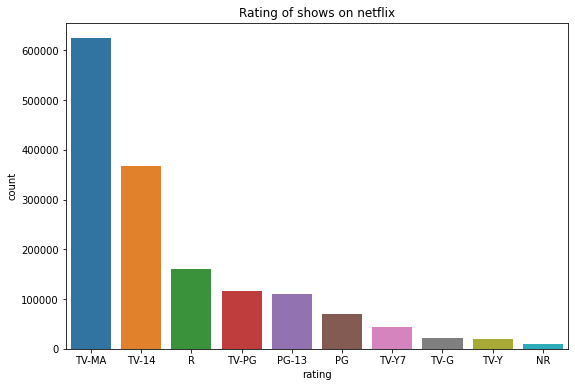

In [142]:
plt.figure(figsize = (9,6))
sns.countplot(x = 'rating', order = df['rating'].value_counts().index[0:10],data = df)
plt.title('Rating of shows on netflix')

Most of the shows has rating TV-MA(mature adults) and TV-14(above 14) ratings.

In [53]:
df.release_year.value_counts()[:20]

2019    200983
2020    182466
2018    175149
2017    152605
2016    124455
2021    111280
2015     96492
2014     54404
2013     53747
2012     43175
2011     36696
2010     36244
2008     33957
2009     33380
2007     19532
2006     18398
1999     15586
2005     14897
2004     14588
2003     13360
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Content release in years on Netflix vs Counts')

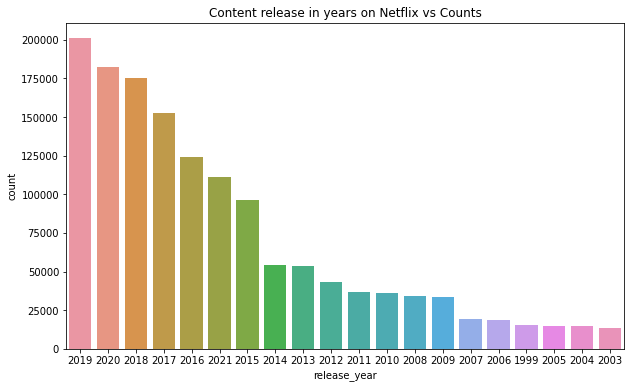

In [54]:
plt.figure(figsize = (10,6))
sns.countplot(x='release_year',order=df['release_year'].value_counts().index[0:20],data=df)
plt.title('Content release in years on Netflix vs Counts')

# Popular Genres

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

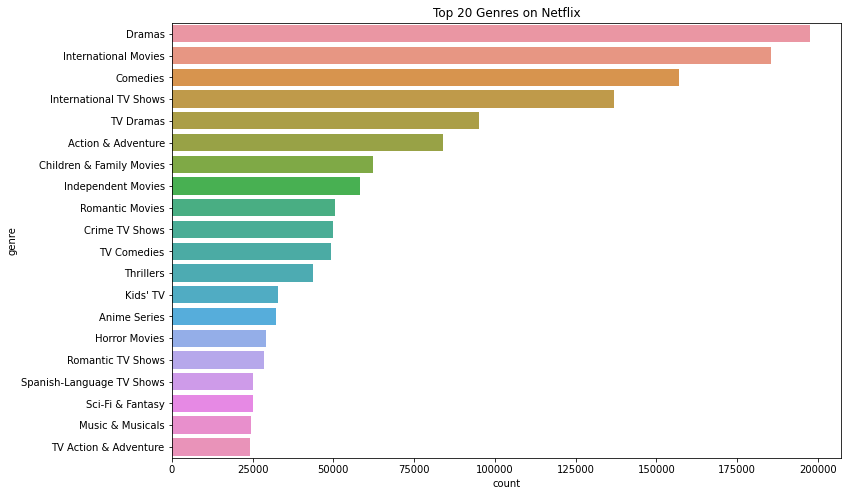

In [55]:
plt.figure(figsize = (12,8))
sns.countplot(y='genre',order=df['genre'].value_counts().index[0:20],data=df)
plt.title('Top 20 Genres on Netflix')

# Actor who has is in maximum movies

Text(0.5, 1.0, 'Actor who is featured in most movies')

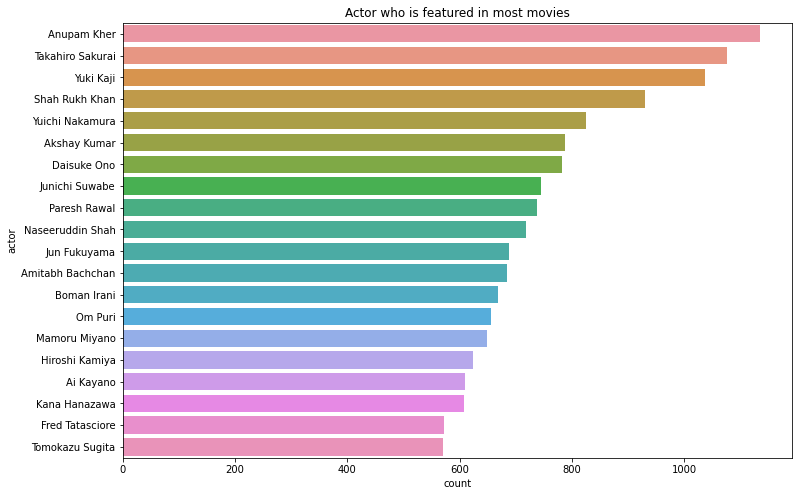

In [56]:
plt.figure(figsize = (12,8))
sns.countplot(y='actor',order=df['actor'].value_counts().index[1:21],data=df)
plt.title('Actor who is featured in most movies')

# Director with maximum movie

Text(0.5, 1.0, 'Top 20 director on Netflix')

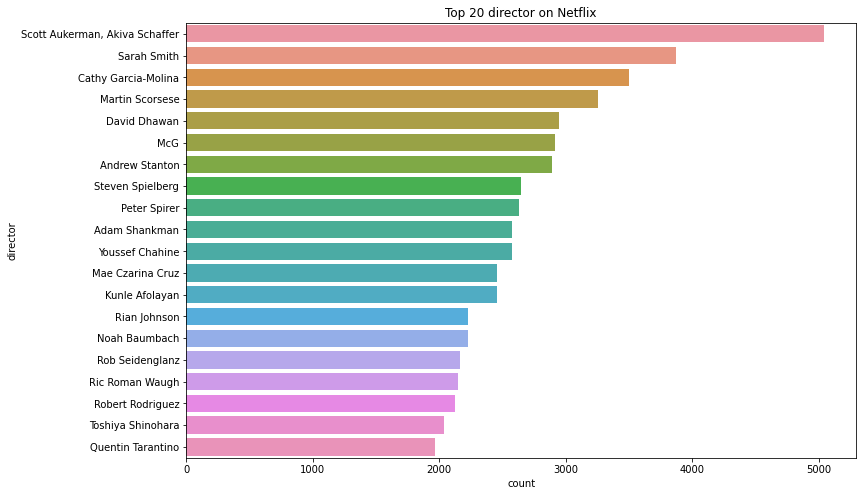

In [57]:
plt.figure(figsize = (12,8))
sns.countplot(y='director',order=df['director'].value_counts().index[1:21],data=df)
plt.title('Top 20 director on Netflix')

**Summary**
So, far I have performed lots of operations over the dataset to dig out some very useful information form it. If, we have to conclude the dataset in few line, then we can say that:

* Netflix has more movies than TV shows.
* Most number of movies and TV shows are produced by United States, followed by India who has produced the second most number of movies on Netflix.
* Most content on Netflix(Movies and TV shows) are for Matured adults.
* 2018 is the year in which Netflix released maximum content as compared to other years.
* Dramas and International Movies are the most popular Genres on Netflix


In [121]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,description,actor,genre,duration_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",nan,Documentaries,90
1,s2,TV Show,Blood & Water,Unavilable,South Africa,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,2
2,s2,TV Show,Blood & Water,Unavilable,South Africa,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Dramas,2
3,s2,TV Show,Blood & Water,Unavilable,South Africa,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Mysteries,2
4,s2,TV Show,Blood & Water,Unavilable,South Africa,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,2
